# 浅copy
定义：重新分配一块内存，创建一个新的对象，里面的元素是元对象中子对象的引用

LINK:  [浅copy详情页](https://segmentfault.com/a/1190000018874254)

##  '=='操作符比较对象之间的值是否相等,'is'操作符比较的是对象的身份标识是否相等，即它们是否是同一个对象，是否指向同一个内存地址。


In [ ]:
a = 10
b = 10
 
a == b
True
 
id(a)
4427562448
 
id(b)
4427562448
 
a is b
True

*python为10这个值开辟一个内存，a和b同时指向这个内存区域，因此a==b且a is b，但是只适用于-5~256，出于对性能优化的考虑，Python 内部会对 -5 到 256 的整型维持一个数组，起到一个缓存的作用。这样，每次你试图创建一个 -5 到 256 范围内的整型数字时，Python 都会从这个数组中返回相对应的引用，而不是重新开辟一块新的内存空间。如果超过了，python会为两个257开辟两个内存区域，使得ID不再相同*

**速度方面： is的效率大于“==”，因为is操作符不能被重载，而“==”操作符a==b，相当于执行a.__ eql __(b)进行重载，来比较他们的顺序和值是否相等。**

## 元组嵌套的元素可以是列表，修改某个可变元素，导致元组本身改变，is或者==取得的值可能不适用。

In [ ]:
t1 = (1, 2, [3, 4])
t2 = (1, 2, [3, 4])
t1 == t2
True
 
t1[-1].append(5)#不可变数据类型中的可变数据类型发生更改，元组发生改变，重新开辟一个内存地址。
t1 == t2
False

## 浅copy的特点
**！！！对于不可变数据类型，浅copy不改变内存地址，
  对于可变数据类型，浅copy改变内存地址**
  
浅copy的方法是使用数据类型本身的构造器，类如，list（）,set(),[:],copy.copy()...

In [57]:
#！！！可变数据类型，重新开辟一个内存地址，相同的引用
l1=[1,2,3,4]   #内存地址不相同，但内部元素是指向同一个引用
l2=list(l1)  
print(id(l1))
print(id(l2))
print(l1==l2)
print(l1 is l2)

1923885634112
1923885330048
True
False


In [61]:
#！！！不可变数据类型，不会开辟一个新的内存，是唯一的！
str1="asd"
str2=str(str1)
print(id(str1))
print(id(str2))
print(str1 is str2)

1923885331376
1923885331376
True


##  对于元组，使用 tuple() 或者切片操作符':'不会创建一份浅拷贝，相反，它会返回一个指向相同元组的引用.
<u>*若内部有不可变数据类型，则整体增加，作用于不同的对象</u>，若内部的可变序列发生改变，则指向相同的对象。*

In [93]:
#exa1
t1=(1,2,3)
t2=tuple(t1)
print(t1==t2)
print(t1 is t2)    #元组只创建一次，t1，t2同时指向这个元组

True
True


In [97]:
#exa2
l1 = [[1, 2], (30, 40)]
l2 = l1[:]  #仅仅是l2的元素和l1指向同一个列表和元组，作为整体是独立的
# print(id(l1))
# print(id(l2))
l1.append(100)
print(l1)
# l1[0].append(3)#因为内部元素指向同一个列表，所以都会发生改变
# print(l1)
print(l2)  #作为整体是相互独立的
l1[1]=l1[1]+(50,60)  #因为元组是不可变的，表示引用了一个新的元组，而l2没有引用新的元组
#因为 l2 和 l1 作为整体是两个不同的对象，并不共享内存地址。操作过后 l2 不变，l1 会发生改变
print(l1)
print(l2)

[[1, 2], (30, 40), 100]
[[1, 2], (30, 40)]
[[1, 2], (30, 40, 50, 60), 100]
[[1, 2], (30, 40)]


LINK:**[论浅copy]**(https://www.songbingjia.com/python/show-36217.html)
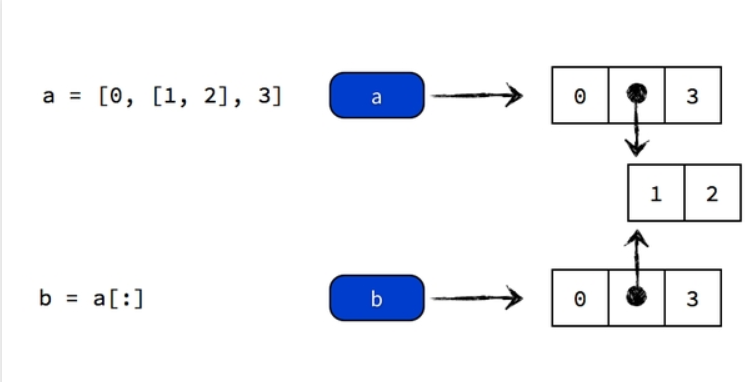

In [95]:
#exa3
a = [0, [1, 2], 3]
b = a[:]
a[0] = 8 #因为浅copy整体是独立的（int是不可变数据类型，只能新建一个引用），内部元素引用相同，
a[1][1] = 9 #内部可变元素指向同一个内存
print(a)
print(b)

[8, [1, 9], 3]
[0, [1, 9], 3]


In [100]:
#exa4
a = [0, (1, 2), 3]
b = a[:]
a[0] = 8 #因为是整体独立，内部元素引用同一个地址
a[1]=a[1]+(1,3)#元组是不可变的，a中创建了一个新的元组，导致引用不同
print(a)
print(b)

[8, (1, 2, 1, 3), 3]
[0, (1, 2), 3]


# 深度copy
两个变量完全独立，没有任何关联,重新分配一个内存，创建一个新的对象，将原对象中的元素，以递归的方式，通过创建新的子对象拷贝到新对象中。
python中使用copy.deepcopy()操作

In [38]:
import copy
l1=[[1, 2], (30, 40)]
l2=copy.deepcopy(l1)
print(id(l1))
print(id(l2))
l1.append(100)
l1[0].append(3)
print(l1)
print(l2)

1923882717824
1923882680064
[[1, 2, 3], (30, 40), 100]
[[1, 2], (30, 40)]


## 深度copy，如果被拷贝对象中存在指向自身的引用，容易陷入无限循环，导致stack overflow

In [102]:
import copy
x = [1]
x.append(x)
print(x) #由于x对自身的引用，会指向自己
y = copy.deepcopy(x)
print(y)

[1, [...]]
[1, [...]]


### 深度拷贝 x 到 y 后，程序并没有出现 stack overflow 的现象。
*因为深度拷贝函数 deepcopy 中会维护一个字典，记录已经拷贝的对象与其 ID。拷贝过程中，如果字典里已经存储了将要拷贝的对象，则会从字典直接返回*

In [ ]:
def deepcopy(x, memo=None, _nil=[]):
    """Deep copy operation on arbitrary Python objects.
    	
	See the module's __doc__ string for more info.
	"""
	
    if memo is None:
        memo = {}
    d = id(x) # 查询被拷贝对象 x 的 id
	y = memo.get(d, _nil) # 查询字典里是否已经存储了该对象
	if y is not _nil:
	    return y # 如果字典里已经存储了将要拷贝的对象，则直接返回
        ... 

比较操作符'=='表示比较对象间的值是否相等，而'is'表示比较对象的标识是否相等，即它们是否指向同一个内存地址。

比较操作符'is'效率优于'=='，因为'is'操作符无法被重载，执行'is'操作只是简单的获取对象的 ID，并进行比较；而'=='操作符则会递归地遍历对象的所有值，并逐一比较。

浅拷贝中的元素，是原对象中子对象的引用，因此，如果原对象中的元素是可变的，改变其也会影响拷贝后的对象，存在一定的副作用。

深度拷贝则会递归地拷贝原对象中的每一个子对象，因此拷贝后的对象和原对象互不相关。另外，深度拷贝中会维护一个字典，记录已经拷贝的对象及其 ID，来提高效率并防止无限递归的发生。

### extertion

In [41]:
import copy
x = [1]
x.append(x)
 
y = copy.deepcopy(x)
 
# 以下命令的输出是？
print(x == y)

RecursionError: maximum recursion depth exceeded in comparison

运行代码时报错。原因是进行"=="时需要递归对比每一个元素，该循环是一个无限循环（无限个元素）。然而python专门设置的一种机制用来防止无限递归造成Python stack overflow崩溃，换句话说不能遍历比较到所有值，所以报错“RecursionError: maximum recursion depth exceeded in comparison”